### Emotion Detector App using StreamLit
- Detecting Emotions
- Train a Text Classifier

In [28]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import Packages

# Exploratory Data Analysis Packages (EDA)
import pandas as pd
import numpy as np

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Text Cleaning
import neattext as nt
import neattext.functions as nfx

# Machine Learning Packages
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [30]:
pd.set_option('display.max_columns',100)

In [31]:
# Load Dataset
df = pd.read_csv('../data/emotion_dataset_raw.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [33]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [34]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

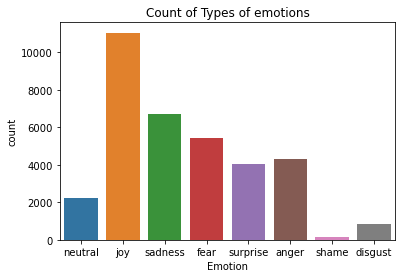

In [35]:
sns.countplot(x='Emotion', data = df)
plt.title("Count of Types of emotions")
plt.show()

In [36]:
df.shape

(34792, 2)

In [37]:
df.drop_duplicates().shape

(31162, 2)

In [38]:
df.drop_duplicates('Text').shape

(31110, 2)

In [39]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [40]:
# Removing Stop words
df['CleanText'] = df['Text'].apply(nfx.remove_stopwords)

In [41]:
# Removing Stop words
df['CleanText'] = df['CleanText'].apply(nfx.remove_userhandles)

In [42]:
df.head()

,Emotion,Text,CleanText
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga a...


In [43]:
x_train, x_test, y_train, y_test = train_test_split(
    df['Text'], df['Emotion'], test_size = 0.2, random_state=0)

In [44]:
pipeline_lr = Pipeline(steps=[('cv', CountVectorizer()), 
                              ('lr', LogisticRegression())])

In [45]:
# Model training and feature
pipeline_lr.fit(x_train, y_train)

C:\Users\Gauri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [46]:
sample_sent = "I'm really going to miss this place!"

In [47]:
pipeline_lr.predict([sample_sent])

array(['sadness'], dtype=object)

In [48]:
pipeline_lr.predict_proba([sample_sent])

array([[0.07046953, 0.02221977, 0.01860824, 0.09836339, 0.0371228 ,
        0.67979105, 0.00076846, 0.07265676]])

In [49]:
pipeline_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [50]:
pipeline_lr.score(x_test, y_test)

0.6502371030320448

In [52]:
with open(r'C:\Users\Gauri\Desktop\Preetha\SDP (DataScience)\emotion-detector-app\models\emotion_classifier.pkl', "wb") as ec:
  joblib.dump(pipeline_lr, ec)